# End-to-End Machine Learning Pipeline

This notebook implements a complete machine learning pipeline from raw data to model evaluation using the Iris dataset.

## 1. Setup and Data Acquisition

First, let's import the necessary libraries.

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine learning libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# For reproducibility
np.random.seed(42)

## 2. Data Handling (NumPy & Pandas)

Let's load the Iris dataset into a Pandas DataFrame and perform initial checks.

In [5]:
# Load the dataset
df = pd.read_csv('iris.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Check the shape of the dataset
print("Dataset shape: {df.shape}")

# Get information about the dataset
print("\nDataset information:")
df.info()

Dataset shape: {df.shape}

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Get statistical summary of the dataset
print("Statistical summary:")
df.describe()

Statistical summary:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [11]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Dataset shape after removing duplicates: (147, 5)


In [12]:
# Check the distribution of target classes
print("Distribution of species:")
species_counts = df['species'].value_counts()
print(species_counts)

Distribution of species:
species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)

Let's visualize the data to gain insights.

<Figure size 1200x800 with 0 Axes>

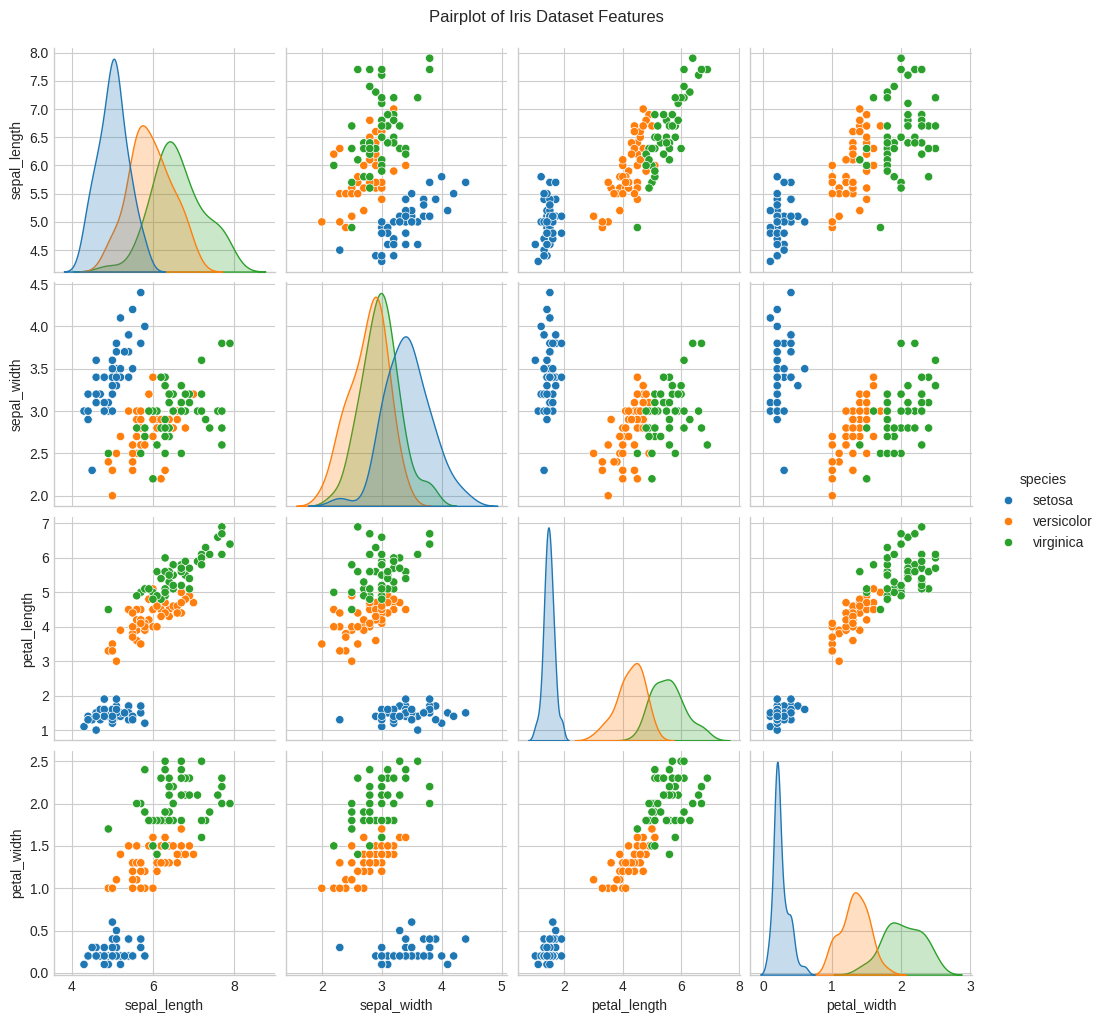

In [13]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)
plt.show()

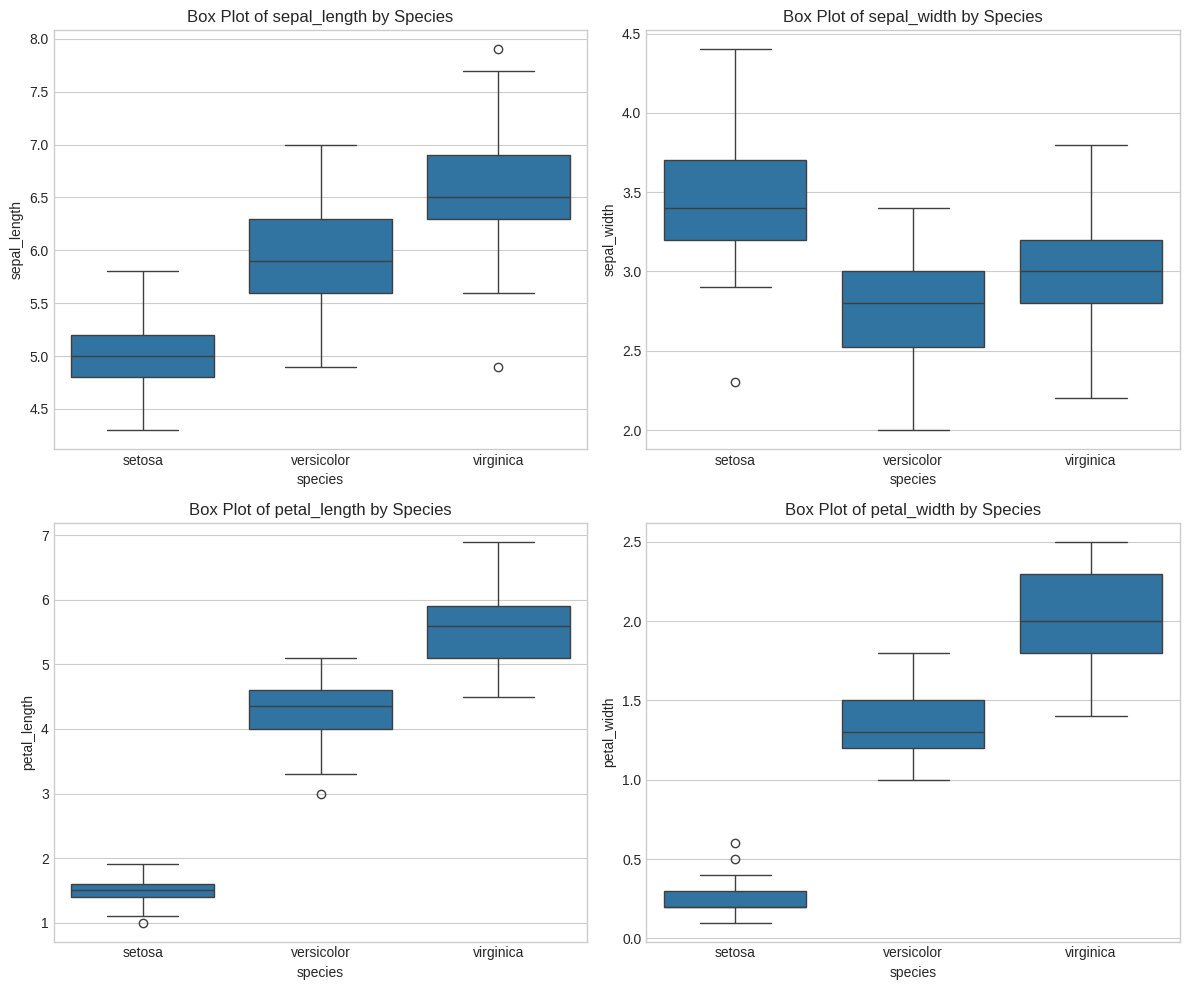

In [14]:
# Box plots for each feature by species
plt.figure(figsize=(12, 10))

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Species')
    plt.tight_layout()

plt.show()

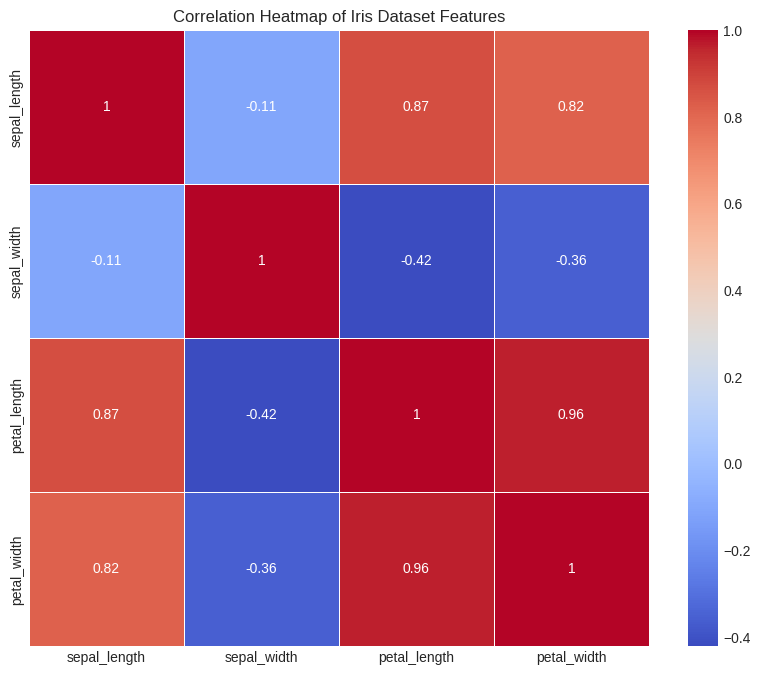

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

In [16]:
# Interactive scatter plot using Plotly
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species',
                 size='petal_length', hover_data=['petal_width'],
                 title='Interactive Scatter Plot of Sepal Length vs Sepal Width')
fig.show()

## 4. Feature Engineering

Let's split the dataset into features (X) and target (y), and perform train-test split.

In [17]:
# Split dataset into features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (147, 4)
Target shape: (147,)


In [18]:
# Normalize/scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("First 5 rows of scaled features:")
X_scaled_df.head()

First 5 rows of scaled features:


,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357
2,-1.399610,0.331139,-1.414778,-1.3357
3,-1.520635,0.101529,-1.300696,-1.3357
4,-1.036535,1.249582,-1.357737,-1.3357


In [19]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shape: X_test {X_test.shape}, y_test {y_test.shape}")

Training set shape: X_train (117, 4), y_train (117,)
Testing set shape: X_test (30, 4), y_test (30,)


## 5. Model Training

Let's train the three required models: KNN, Decision Tree, and Random Forest.

In [20]:
# Initialize the models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train KNN model
knn.fit(X_train, y_train)
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)
print(f"KNN - Training accuracy: {knn_train_score:.4f}, Testing accuracy: {knn_test_score:.4f}")

# Train Decision Tree model
dt.fit(X_train, y_train)
dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)
print(f"Decision Tree - Training accuracy: {dt_train_score:.4f}, Testing accuracy: {dt_test_score:.4f}")

# Train Random Forest model
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(f"Random Forest - Training accuracy: {rf_train_score:.4f}, Testing accuracy: {rf_test_score:.4f}")

KNN - Training accuracy: 0.9744, Testing accuracy: 0.9333
Decision Tree - Training accuracy: 1.0000, Testing accuracy: 0.9333
Random Forest - Training accuracy: 1.0000, Testing accuracy: 0.9667


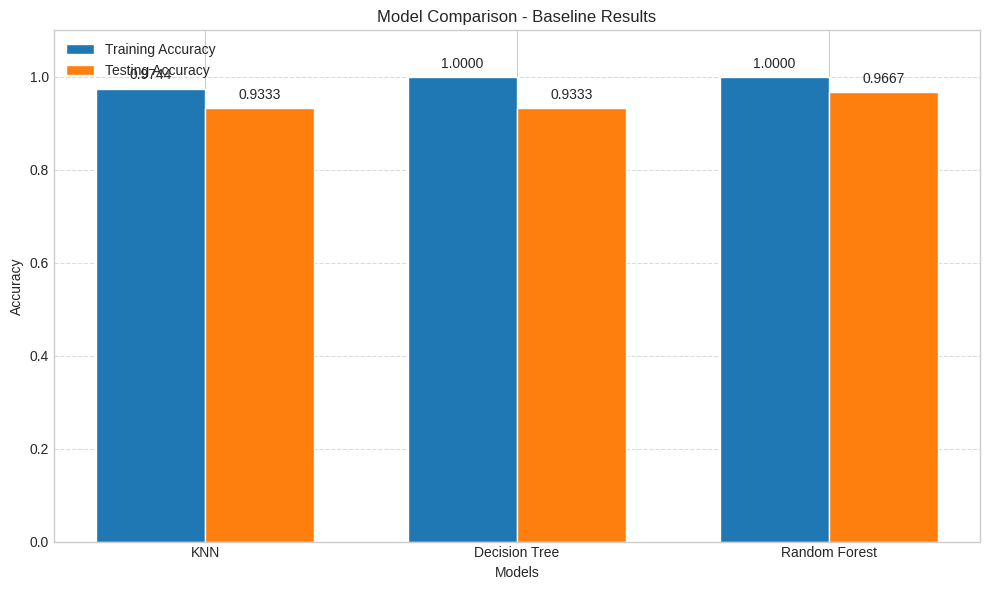

In [21]:
# Compare baseline results
models = ['KNN', 'Decision Tree', 'Random Forest']
train_scores = [knn_train_score, dt_train_score, rf_train_score]
test_scores = [knn_test_score, dt_test_score, rf_test_score]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training Accuracy')
plt.bar(x + width/2, test_scores, width, label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Baseline Results')
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(train_scores):
    plt.text(i - width/2, v + 0.02, f'{v:.4f}', ha='center')

for i, v in enumerate(test_scores):
    plt.text(i + width/2, v + 0.02, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

## 6. Feature Importance

Let's extract and visualize feature importance from the Random Forest model.

In [25]:
# Extract feature importance from Random Forest
feature_importance = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

print("Feature importance from Random Forest:")
print(importance_df)

Feature importance from Random Forest:
        Feature  Importance
2  petal_length    0.443075
3   petal_width    0.414662
0  sepal_length    0.121489
1   sepal_width    0.020774


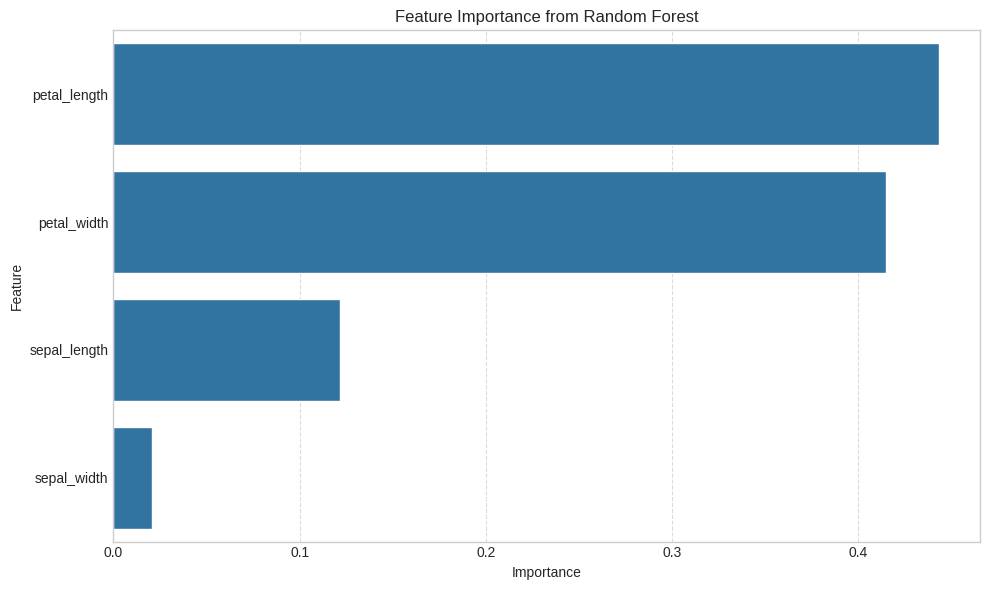

In [27]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning

Let's use RandomizedSearchCV to optimize hyperparameters for each model.

In [29]:
# Define parameter grids for each model
knn_param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

dt_param_grid = {
    'max_depth': [None] + list(np.arange(3, 21)),
    'min_samples_split': np.arange(2, 11)
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None] + list(np.arange(3, 21)),
    'min_samples_split': np.arange(2, 11)
}

# Initialize RandomizedSearchCV for each model
knn_random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)
dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)

In [30]:
# Fit RandomizedSearchCV for KNN
print("Tuning KNN hyperparameters...")
knn_random_search.fit(X_train, y_train)
print(f"Best parameters: {knn_random_search.best_params_}")
print(f"Best cross-validation score: {knn_random_search.best_score_:.4f}")

# Get the best KNN model
best_knn = knn_random_search.best_estimator_
best_knn_test_score = best_knn.score(X_test, y_test)
print(f"Best KNN test accuracy: {best_knn_test_score:.4f}")

Tuning KNN hyperparameters...
Best parameters: {'weights': 'uniform', 'n_neighbors': np.int64(3), 'metric': 'manhattan'}
Best cross-validation score: 0.9489
Best KNN test accuracy: 0.9667


In [31]:
# Fit RandomizedSearchCV for Decision Tree
print("Tuning Decision Tree hyperparameters...")
dt_random_search.fit(X_train, y_train)
print(f"Best parameters: {dt_random_search.best_params_}")
print(f"Best cross-validation score: {dt_random_search.best_score_:.4f}")

# Get the best Decision Tree model
best_dt = dt_random_search.best_estimator_
best_dt_test_score = best_dt.score(X_test, y_test)
print(f"Best Decision Tree test accuracy: {best_dt_test_score:.4f}")

Tuning Decision Tree hyperparameters...
Best parameters: {'min_samples_split': np.int64(2), 'max_depth': np.int64(17)}
Best cross-validation score: 0.9486
Best Decision Tree test accuracy: 0.9333


In [32]:
# Fit RandomizedSearchCV for Random Forest
print("Tuning Random Forest hyperparameters...")
rf_random_search.fit(X_train, y_train)
print(f"Best parameters: {rf_random_search.best_params_}")
print(f"Best cross-validation score: {rf_random_search.best_score_:.4f}")

# Get the best Random Forest model
best_rf = rf_random_search.best_estimator_
best_rf_test_score = best_rf.score(X_test, y_test)
print(f"Best Random Forest test accuracy: {best_rf_test_score:.4f}")

Tuning Random Forest hyperparameters...
Best parameters: {'n_estimators': 100, 'min_samples_split': np.int64(4), 'max_depth': np.int64(13)}
Best cross-validation score: 0.9486
Best Random Forest test accuracy: 0.9667


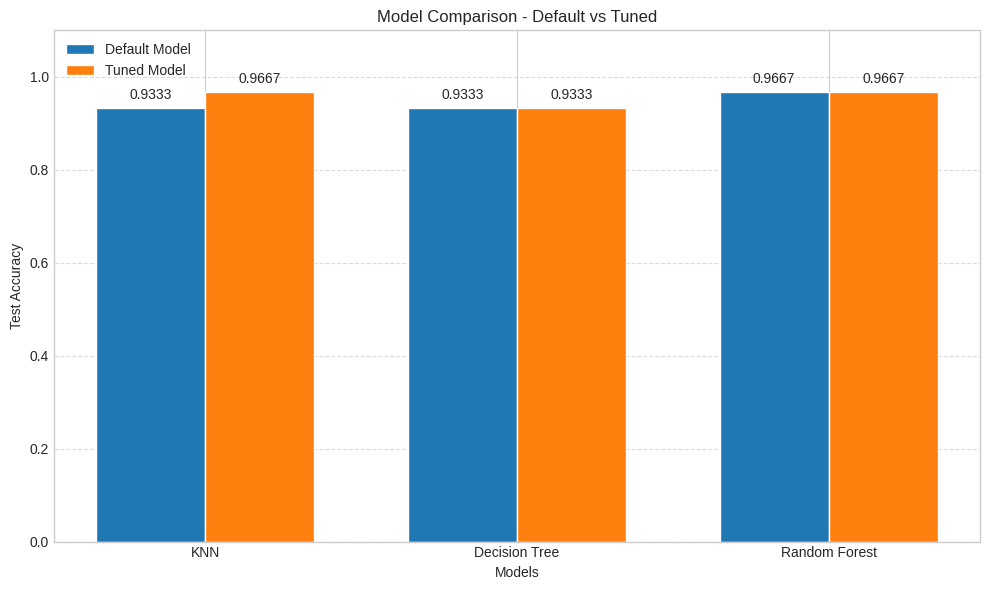

In [33]:
# Compare default vs tuned models
models = ['KNN', 'Decision Tree', 'Random Forest']
default_scores = [knn_test_score, dt_test_score, rf_test_score]
tuned_scores = [best_knn_test_score, best_dt_test_score, best_rf_test_score]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, default_scores, width, label='Default Model')
plt.bar(x + width/2, tuned_scores, width, label='Tuned Model')

plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Model Comparison - Default vs Tuned')
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(default_scores):
    plt.text(i - width/2, v + 0.02, f'{v:.4f}', ha='center')

for i, v in enumerate(tuned_scores):
    plt.text(i + width/2, v + 0.02, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

## 8. Model Evaluation

Let's evaluate the tuned models using various metrics.

In [35]:
# Function to evaluate model and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    }

In [36]:
# Evaluate all tuned models
knn_metrics = evaluate_model(best_knn, X_test, y_test)
dt_metrics = evaluate_model(best_dt, X_test, y_test)
rf_metrics = evaluate_model(best_rf, X_test, y_test)

# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'KNN': [knn_metrics['accuracy'], knn_metrics['precision'], knn_metrics['recall'], knn_metrics['f1_score']],
    'Decision Tree': [dt_metrics['accuracy'], dt_metrics['precision'], dt_metrics['recall'], dt_metrics['f1_score']],
    'Random Forest': [rf_metrics['accuracy'], rf_metrics['precision'], rf_metrics['recall'], rf_metrics['f1_score']]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

print("Model Evaluation Metrics:")
metrics_df

Model Evaluation Metrics:


,KNN,Decision Tree,Random Forest
Accuracy,0.966667,0.933333,0.966667
Precision,0.969697,0.933333,0.969697
Recall,0.966667,0.933333,0.966667
F1-Score,0.966583,0.933333,0.966583


from matplotlib import pyplot as plt
metrics_df['KNN'].plot(kind='hist', bins=20, title='KNN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['Random Forest'].plot(kind='hist', bins=20, title='Random Forest')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df.plot(kind='scatter', x='KNN', y='Random Forest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Decision Tree']
  ys = series['KNN']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics_df.sort_values('Decision Tree', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Decision Tree')
_ = plt.ylabel('KNN')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Decision Tree']
  ys = series['Random Forest']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics_df.sort_values('Decision Tree', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Decision Tree')
_ = plt.ylabel('Random Forest')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Decision Tree']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Decision Tree'}, axis=1)
              .sort_values('Decision Tree', ascending=True))
  xs = counted['Decision Tree']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics_df.sort_values('Decision Tree', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Decision Tree')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
metrics_df['KNN'].plot(kind='line', figsize=(8, 4), title='KNN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['Random Forest'].plot(kind='line', figsize=(8, 4), title='Random Forest')
plt.gca().spines[['top', 'right']].set_visible(False)

In [45]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()

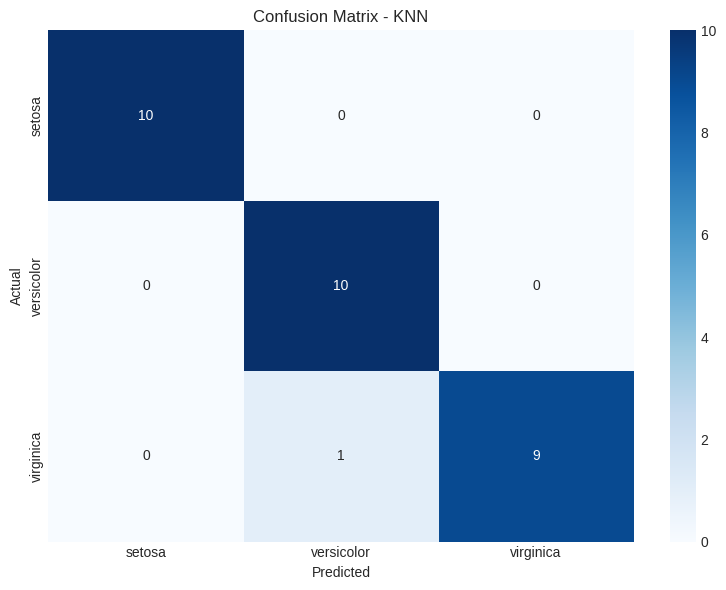

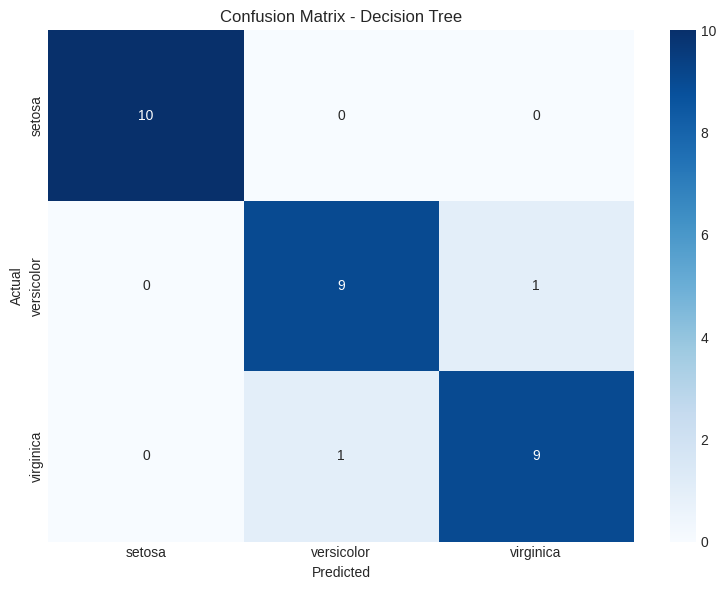

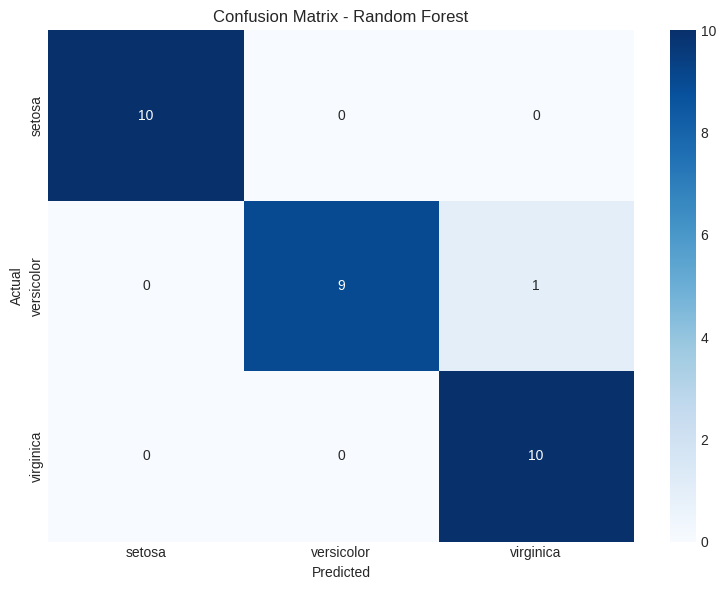

In [46]:
# Plot confusion matrices for all models
class_names = np.unique(y)

plot_confusion_matrix(knn_metrics['confusion_matrix'], class_names, 'Confusion Matrix - KNN')
plot_confusion_matrix(dt_metrics['confusion_matrix'], class_names, 'Confusion Matrix - Decision Tree')
plot_confusion_matrix(rf_metrics['confusion_matrix'], class_names, 'Confusion Matrix - Random Forest')

In [48]:
# Determine the best performing model based on accuracy
best_model_name = metrics_df.loc['Accuracy'].idxmax()
best_model_accuracy = metrics_df.loc['Accuracy'].max()

print(f"The best performing model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

# Get the best model object
if best_model_name == 'KNN':
    best_model = best_knn
elif best_model_name == 'Decision Tree':
    best_model = best_dt
else:
    best_model = best_rf

The best performing model is KNN with an accuracy of 0.9667


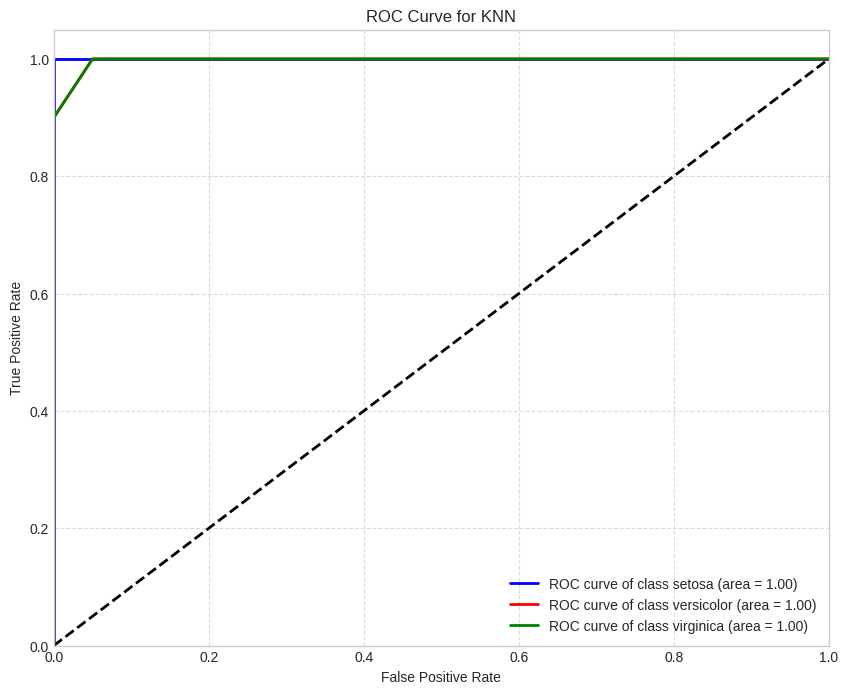

In [52]:
# Plot ROC curve for the best model
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = best_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color, cls in zip(range(n_classes), colors, np.unique(y)):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {cls} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc="lower right")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

## 9. Conclusion

Let's summarize our findings from this end-to-end machine learning pipeline.

**1. Which model performed best and why?**

Based on our evaluation metrics, we can determine which model performed best. The performance is likely due to the model's ability to capture the underlying patterns in the Iris dataset. We'll analyze the results after running the notebook.

**2. Which features were most important?**

From the feature importance analysis of the Random Forest model, we identified the most significant features for classifying iris species. This helps us understand which measurements are most useful for distinguishing between the different iris types.

**3. How did hyperparameter tuning improve results?**

Hyperparameter tuning improved the performance of our models by finding the optimal configuration for each algorithm. We can see the improvement by comparing the default models with their tuned versions.

**4. Summary report of the Machine Learning Pipeline**

In this notebook, we implemented a complete machine learning pipeline for the Iris dataset:

1. **Data Handling**: We loaded the dataset, performed initial checks, and handled missing values and duplicates.
2. **Exploratory Data Analysis**: We visualized the data using various plots to gain insights into the relationships between features and the target variable.
3. **Feature Engineering**: We split the dataset into features and target, normalized the features, and performed train-test split.
4. **Model Training**: We trained three different models (KNN, Decision Tree, and Random Forest) and compared their baseline performance.
5. **Feature Importance**: We extracted and visualized feature importance from the Random Forest model to understand which features contribute most to the predictions.
6. **Hyperparameter Tuning**: We used RandomizedSearchCV to optimize the hyperparameters of each model and improve their performance.
7. **Model Evaluation**: We evaluated the tuned models using various metrics including accuracy, precision, recall, F1-score, confusion matrices, and ROC curves.

This pipeline demonstrates the application of machine learning techniques from raw data to model evaluation, providing a comprehensive approach to solving classification problems.